# Datathon BRK 
## eficiencia operacional no saneamento 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carregando dados

In [78]:
path = 'municipio.csv'
df = pd.read_csv(path, sep=";")

df.index = df.id_municipio
df.head()

,sigla_uf,id_municipio,populacao_urbana_2013,populacao_urbana_2035,prestador_servico_esgoto,sigla_prestador,indice_sem_atend,indice_atend_solucao_ind,indice_atend_col_sem_trat,indice_atend_col_trat,...,populacao_atendida_2035,investimento_col,investimento_trat,investimento_col_trat,necessidade_remocao_dbo,tipologia_solucao,atencao_fosforo,atencao_nitrogenio,Unnamed: 40,Unnamed: 41
id_municipio,,,,,,,,,,,,,,,,,,,,,
1100015,RO,1100015,14735,15507,Serviço Autônomo de Água e Esgoto,SAAE,"96,7","1,9","1,4",0,...,13956,"16866794,48","4298529,94","21165324,42",Acima de 80%,Tratamento secundário avançado,Não,Não,NaN,NaN
1100023,RO,1100023,85770,121503,Companhia de Águas e Esgotos de Rondônia,CAERD,"89,4","8,6",2,0,...,109353,"119460468,9","25041739,67","144502208,6",Entre 60 e 80%,Tratamento secundário convencional,Não,Não,NaN,NaN
1100031,RO,1100031,2771,3349,Prefeitura Municipal de Cabixi,PM,99,"0,6","0,4",0,...,3014,"4860355,53","690255,84","5550611,37",Entre 60 e 80%,Tratamento secundário convencional,Não,Não,NaN,NaN
1100049,RO,1100049,67665,80311,Serviço Autônomo de Água e Esgoto de Cacoal,SAAE,"28,8","16,2",0,55,...,72280,"38921408,98","4891916,8","43813325,77",Entre 60 e 80%,Tratamento secundário convencional,Não,Não,NaN,NaN
1100056,RO,1100056,15276,14254,Prefeitura Municipal de Cerejeiras,PM,"79,6","19,7","0,7",0,...,12829,"15623409,94","3951303,59","19574713,53",Acima de 80%,Tratamento secundário avançado,Não,Não,NaN,NaN


## Formatando dados para representação em grafico

In [79]:
df['investimento_col_trat'] = df['investimento_col_trat'].astype(str)
df['investimento_col_trat'] = df['investimento_col_trat'].str.replace(',', '.')

df['investimento_col_trat'] = df['investimento_col_trat'].astype(float)

df.head()

,sigla_uf,id_municipio,populacao_urbana_2013,populacao_urbana_2035,prestador_servico_esgoto,sigla_prestador,indice_sem_atend,indice_atend_solucao_ind,indice_atend_col_sem_trat,indice_atend_col_trat,...,populacao_atendida_2035,investimento_col,investimento_trat,investimento_col_trat,necessidade_remocao_dbo,tipologia_solucao,atencao_fosforo,atencao_nitrogenio,Unnamed: 40,Unnamed: 41
id_municipio,,,,,,,,,,,,,,,,,,,,,
1100015,RO,1100015,14735,15507,Serviço Autônomo de Água e Esgoto,SAAE,"96,7","1,9","1,4",0,...,13956,"16866794,48","4298529,94",2.116532e+07,Acima de 80%,Tratamento secundário avançado,Não,Não,NaN,NaN
1100023,RO,1100023,85770,121503,Companhia de Águas e Esgotos de Rondônia,CAERD,"89,4","8,6",2,0,...,109353,"119460468,9","25041739,67",1.445022e+08,Entre 60 e 80%,Tratamento secundário convencional,Não,Não,NaN,NaN
1100031,RO,1100031,2771,3349,Prefeitura Municipal de Cabixi,PM,99,"0,6","0,4",0,...,3014,"4860355,53","690255,84",5.550611e+06,Entre 60 e 80%,Tratamento secundário convencional,Não,Não,NaN,NaN
1100049,RO,1100049,67665,80311,Serviço Autônomo de Água e Esgoto de Cacoal,SAAE,"28,8","16,2",0,55,...,72280,"38921408,98","4891916,8",4.381333e+07,Entre 60 e 80%,Tratamento secundário convencional,Não,Não,NaN,NaN
1100056,RO,1100056,15276,14254,Prefeitura Municipal de Cerejeiras,PM,"79,6","19,7","0,7",0,...,12829,"15623409,94","3951303,59",1.957471e+07,Acima de 80%,Tratamento secundário avançado,Não,Não,NaN,NaN


## Ordenando municipios por investimento

In [82]:
df.sort_values(['investimento_col_trat'], ascending = False, axis = 0, inplace = True)

df_inv = df.investimento_col_trat.head(20)

df

,sigla_uf,id_municipio,populacao_urbana_2013,populacao_urbana_2035,prestador_servico_esgoto,sigla_prestador,indice_sem_atend,indice_atend_solucao_ind,indice_atend_col_sem_trat,indice_atend_col_trat,...,populacao_atendida_2035,investimento_col,investimento_trat,investimento_col_trat,necessidade_remocao_dbo,tipologia_solucao,atencao_fosforo,atencao_nitrogenio,Unnamed: 40,Unnamed: 41
id_municipio,,,,,,,,,,,,,,,,,,,,,
3304557,RJ,3304557,6429923,6901792,Companhia Estadual de Águas e Esgotos / FAB Zo...,CEDAE / FABZO,"13,8","4,2","15,8","66,2",...,6211613,1010692498,1888248278,2.898941e+09,Requer solução complementar,Outras soluções (revisão da classe do rio corp...,Não,Não,NaN,NaN
2304400,CE,2304400,2551806,3156422,Companhia de Água e Esgoto do Ceará,CAGECE,"2,2","36,8",0,61,...,3156422,1716607225,"954498028,7",2.671105e+09,Requer solução complementar,Outras soluções (revisão da classe do rio corp...,Não,Não,NaN,NaN
3550308,SP,3550308,11715605,12219483,Companhia de Saneamento Básico do Estado de Sã...,SABESP,"10,9","1,7","21,9","65,6",...,10997535,1294713022,1321537475,2.616250e+09,Solução conjunta,Solução conjunta,Sim,Sim,NaN,NaN
1302603,AM,1302603,1972131,2586905,Manaus Ambiental (SOLVI-PARTICIPAÇÕES EM PROJE...,MA (SAAB),"49,3","22,1",0,"28,6",...,2328215,1910612292,"602959080,8",2.513571e+09,Entre 60 e 80%,Tratamento secundário convencional,Não,Não,NaN,NaN
5300108,DF,5300108,2694296,3859955,Companhia de Saneamento Ambiental do Distrito ...,CAESB,"8,6","8,3",0,"83,1",...,3473960,1304604860,"397808269,1",1.702413e+09,Acima de 80%,Tratamento secundário avançado,Sim,Sim,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550506,SP,3550506,5372,6580,Serviço Autônomo de Água e Esgoto,SAAE,0,0,0,100,...,6580,0,0,0.000000e+00,Entre 60 e 80%,Tratamento secundário convencional,Não,Não,NaN,NaN
3517802,SP,3517802,6773,6567,Autarquia Municipal de Saneamento Ambiental de...,SAG,0,0,0,100,...,6567,0,0,0.000000e+00,Entre 60 e 80%,Tratamento secundário convencional,Não,Não,NaN,NaN
4120002,PR,4120002,11453,9237,Companhia de Saneamento do Paraná,SANEPAR,"9,1","0,6",0,"90,4",...,8349,0,0,0.000000e+00,Entre 60 e 80%,Tratamento secundário convencional,Não,Não,NaN,NaN


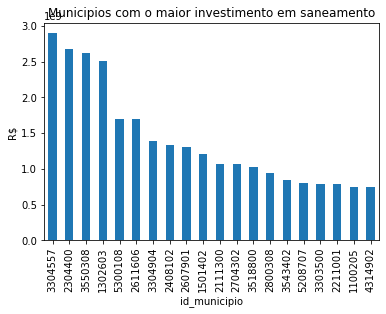

In [81]:
df_inv.plot(kind='bar')

plt.title("Municipios com o maior investimento em saneamento")
plt.ylabel("R$")

plt.show()

In [90]:
import seaborn as sns

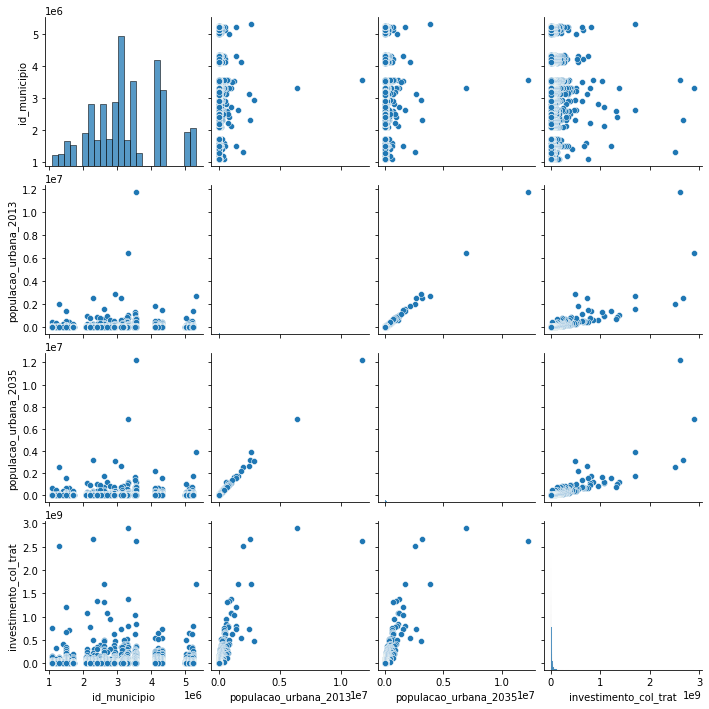

In [92]:
sns.pairplot(df)
